#### 这个文章要好算一些，需要的公式如下
$$ 2^{-7/2}\pi^{-1}(\frac{\hbar^2}{2m})^{3/2}\sqrt{-E}=\frac{1}{U_p-\frac{g_p^2}{\gamma_p-E}} $$
其中
$$ U_p=\frac{4\pi\hbar^2 a_{bg}}{m}$$
$$ g_p^2=\frac{4\pi\hbar^2 a_{bg}\Delta B\mu_{co}}{m}$$
$$ \gamma_p=\mu_{co}(B-B_0)$$

#### 值得注意的是E以费米能为单位
$$ E_F=\frac{\hbar^2(3\pi^2n)^{2/3}}{2m}$$

#### 算的是Li6，数据如下
The parameters for the 6Li atoms are

$$ a_{bg} = −1405a_0 $$
$$ ∆B = −300G $$
$$ µco ∼ 2µB$$

where a0 is the Bohr radius and µB is the Bohr magnetic moment. 

#### 需要的数据如下

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/var/mobile/Containers/Data/Application/13AC7F71-7CC1-4D99-96CD-23203258F2C8/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-009965497445>", line 4, in <module>
    from scipy.integrate import quad
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 951, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 894, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1157, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1126, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1090, in _path_importer_cache
PermissionError: [Errno 1] Operation not permitted

During handling of the above exception, another exception occurred:

Traceback (most

PermissionError: [Errno 1] Operation not permitted

In [122]:
#用到的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#输入参数
abg=-1405*Bohr_radius
delta_B=-300e-4
mu_co=2*Bohr_mag
m=6*u
n=2.9e19

#求解问题的中间变量
Up=4*np.pi*hbar**2*abg/m
gp2=Up*delta_B*mu_co
E0=hbar**2*(3*np.pi**2*n)**(2/3)/2/m

#定义求解函数
def solv(E):
    return 2**(-7/2)/np.pi*(hbar**2/2/m)**(-1.5)*np.sqrt(-E*E0)-1/(Up-gp2/(mu_co*B*1e-4-E*E0))
#                                                                       上面这个B应该是B-B0

In [184]:
#定义求解区间
x4=np.arange(-1000,-100,0.1)
x4=x4[::-1]
print(x4)
Bound_sta=[]
chu=-1
for B in x4:
    solution=optimize.fsolve(solv, chu, xtol=1e-20)
    chu=solution[0]
    Bound_sta.append(solution[0])

[ -100.1  -100.2  -100.3 ...  -999.8  -999.9 -1000. ]


In [185]:
print(Bound_sta)

[-1.004092616444062, -1.0071050951537326, -1.0101251008179928, -1.0131526514760767, -1.0161877652166664, -1.019230460178052, -1.0222807545482875, -1.0253386665653481, -1.028404214517288, -1.031477416742399, -1.0345582916293712, -1.0376468576174498, -1.040743133196601, -1.0438471369076683, -1.0469588873425308, -1.05007840314428, -1.0532057030073654, -1.0563408056777663, -1.059483729953155, -1.0626344946830635, -1.0657931187690435, -1.068959621164835, -1.0721340208765333, -1.0753163369627572, -1.0785065885348122, -1.081704794756862, -1.084910974846096, -1.0881251480728982, -1.0913473337610227, -1.0945775512877554, -1.0978158200840928, -1.1010621596349077, -1.1043165894791296, -1.1075791292099078, -1.1108497984747945, -1.1141286169759173, -1.1174156044701467, -1.120710780769281, -1.1240141657402196, -1.127325779305139, -1.13064564144167, -1.133973772183079, -1.1373101916184443, -1.140654919892836, -1.144007977207499, -1.147369383820027, -1.1507391600445542, -1.1541173262519295, -1.1575039

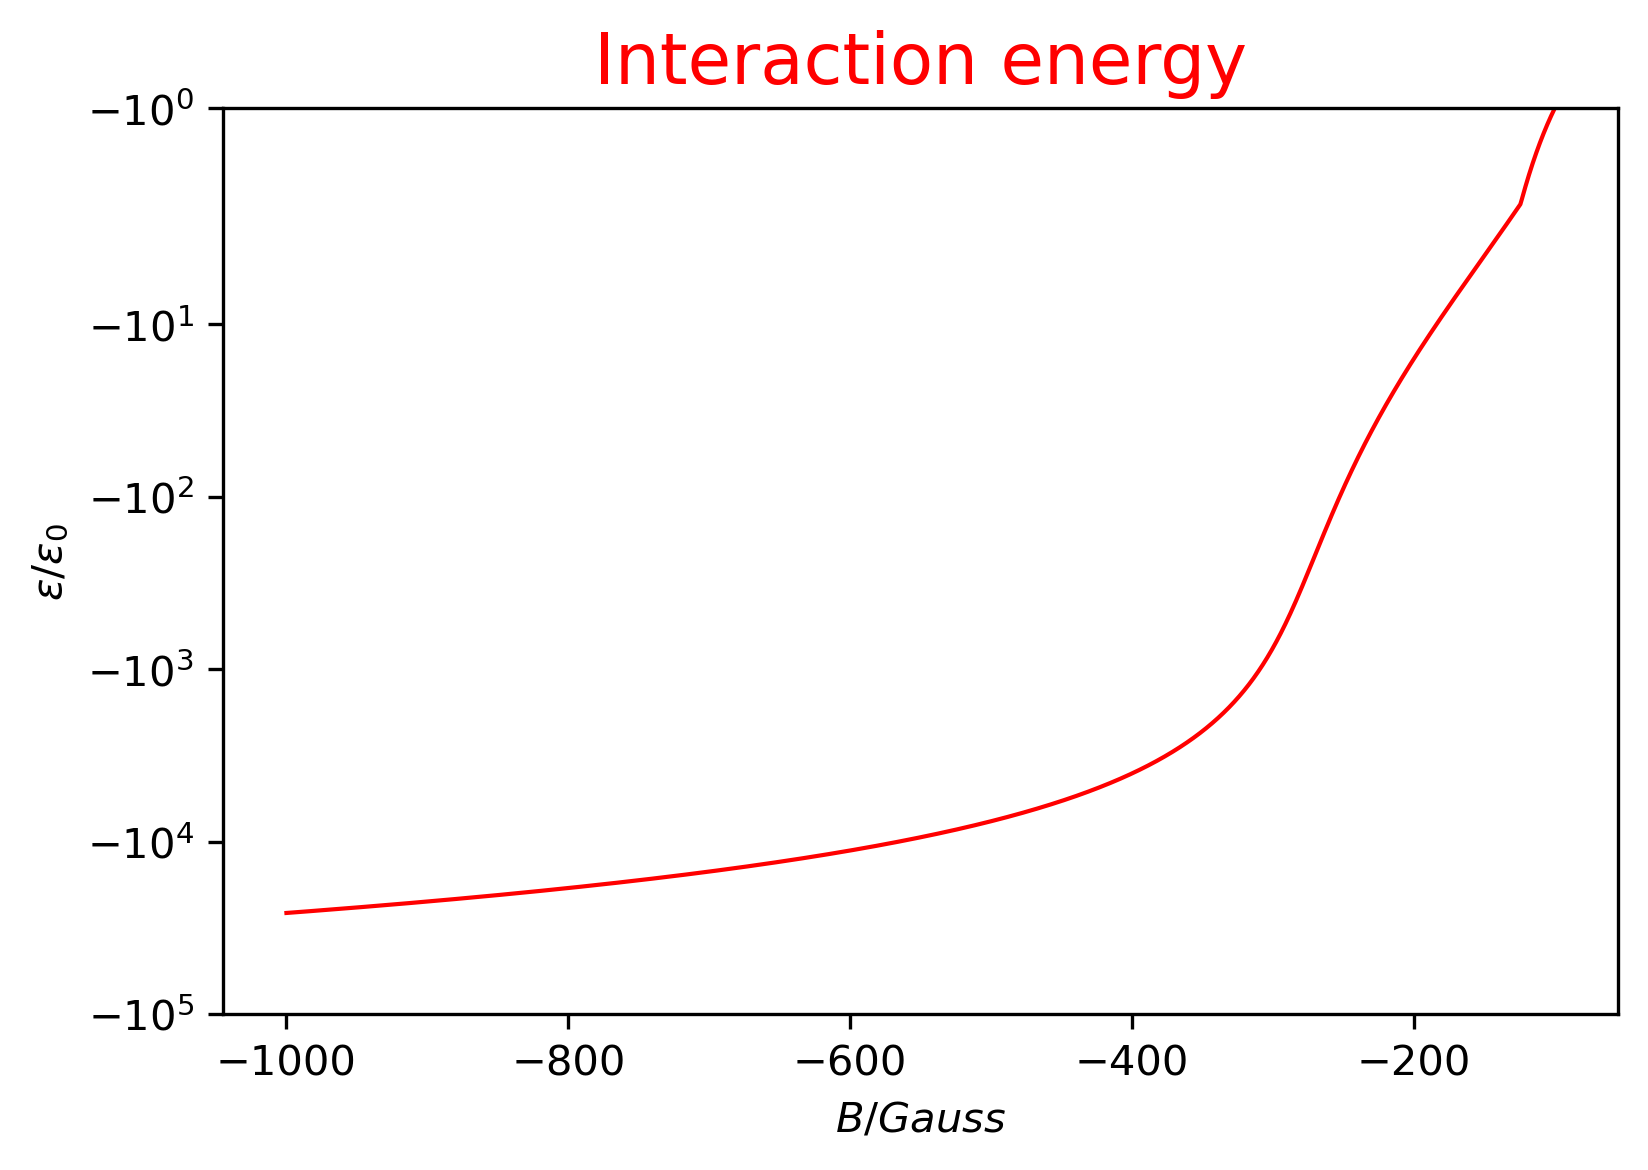

In [187]:
#下面是画图代码
plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta,color='r',linewidth=1.0,linestyle='-')

ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-100000,-1)
plt.yscale('symlog')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.show()